## DQN算法
&emsp;&emsp;DQN是一种经典的基于值函数的深度强化学习算法，它将卷积神经网CNN与Q-Learnig算法相结合，利用CNN对图像的强大表征能力，将视频帧数据视为强化学习中的状态输入网络，然后由网络输出离散的动作值函数，Agent再根据动作值函数选择对应的动作。<br>
&emsp;&emsp;DQN利用CNN输入原始图像数据，能够在不依赖于任意特定问题的情况下，采用相同的算法模型，在广泛的问题中获得较好的学习效果。正如在Atari游戏中，尽管各个游戏的动作具有不同迁移效果，且需要使用不同的策略来获得高分，但DQN可以使用相同的原始输入、网络框架和参数值，得到相应的动作值特征，并取得高分。<br>
&emsp;&emsp;DQN算法常用于处理Atari游戏，但又不局限于此，它可以通过修改Q网络来处理不同的任务。例如：（1）如果输入为图像信息，则可以通过CNN构造Q网络；（2）如果输入为序列数据，则可以通过RNN构建Q网络；（3）如果要增加历史记忆能力，则可以通过结合CNN和长短期记忆模型（LSTM）来构建具有记忆能力的Q网络。<br>
#### 模型架构
&emsp;&emsp;深度Q网络模型架构的输入是距离当前时刻最近的4幅预处理后的图像。该输入信号经过3个卷积层和2个全连接层的非线性变换，变换成低维的、抽象的特征表达，并最终在输出层产生每个动作对应的Q值函数。具体模型架构如下：<br>
&emsp;&emsp;（1）输入层：在Gym环境中，Atari游戏的视频帧大小210*160为像素，每个像素有128种色彩。为了使训练更高效，在保证图片重要特征的情况下，将每一游戏帧预处理为84*84像素的灰度图像，并将连续4帧的游戏图像组成4*84*84像素的张量，作为网络的输入。采用连续4帧画面的目的在于感知游戏环境的动态性。<br>
&emsp;&emsp;（2）对输入层进行卷积操作。将经过预处理之后的最近4幅大小为84*84的图像作为输入，用32个卷积核对输入进行卷积操作，每个卷积核的大小为4*8*8，步长为4。<br>
&emsp;&emsp;（3）对第一隐藏层的输出进行卷积操作。用64个卷积核对第一隐藏层的输出进行卷积操作，每个卷积核的大小为32*4*4，步长为2。这样经过卷积后，得到的特征图尺寸为9：，因此产生64幅大小为9*9的特征图作为第二隐藏层。最后通过ReLU激活函数对第二隐藏层进行线性变换。<br>
&emsp;&emsp;（4）对第二隐藏层的输出进行卷积操作。用64个卷积核对第二隐藏层的输出进行卷积操作，每个卷积核的大小为64*3*3，步长为1。这样经过卷积后，得到的特征图尺寸为7：，因此产生64幅大小为7*7的特征图作为第三隐藏层。同理，对第三隐藏层的输出进行ReLU非线性变换，输出64幅大小为7*7的特征图。此时，第三隐藏层神经元的个数为：3136个。<br>
&emsp;&emsp;（5）第三隐藏层与第四隐藏层的全连接操作。第四隐藏层神经元的个数为512个，这样第三隐藏层的的3136个神经元与第四隐藏层的512个神经元进行全连接操作，并使用ReLU函数进行非线性变换。<br>
&emsp;&emsp;（6）第四隐藏层与输出层的全连接操作。由于输出层输出的是动作空间中所有动作的Q值，因此输出层神经元个数应为具体任务中动作空间的动作数目。以Atari 2600“打砖块”游戏为例，其输出为18个动作。这样第四层的512个神经元与输出层的18个神经元进行全连接操作，并使用ReLU函数进行线性变换。具体的模型架构如图11.1所示：<br>
<center><img src="11-1.png"></center><br>
&emsp;&emsp;<center>图11.1 深度Q网络模型架构</center><br>

#### 数据预处理
&emsp;&emsp;以Gym中的Atari游戏为例，来阐述DQN算法的数据预处理过程。在Gym环境中，Atari游戏的原始图像尺寸为210*160个像素，每个像素有128种颜色。为了算法能更高效地执行，需要对原始图像进行预处理：（1）通过图像变换，使图像变为2种颜色的灰度图像；（2）裁剪掉原始图像中无关紧要的信息像素，使图像尺寸裁剪为个160*160像素；（3）图像进行下采样，使其尺寸变为84*84个像素。<br>
#### 动态信息预处理
&emsp;&emsp;在Gym环境中，模拟器可以以60帧/秒的速度生成实时游戏画面，每一时刻，Agent可以从环境模拟器中取出1帧静态信息，单纯地来处理每1帧静态图像很难表示出游戏的动态信息。因此DQN中选取当前时刻起的前N帧画面（N通常设置为：N=3,4,5），并将这些信息结合起来作为模型的输入，获得某一段时间的动态状态信息。通过这种方式，模型可以学习到更准确的动作值函数，在实验中N=4。<br>
&emsp;&emsp;另外由于模拟器生成并显示画面的速度远远高于人类玩家操作的速度，同时游戏的邻近帧之间画面有极大的相似性，因此在状态帧的选择上，可以采取每次跳过一定的帧数，选取一个连续4帧的状态方式，这样既可以减少系统处理信息的数量，又可以使机器的处理速度与人类玩家保持一致。<br>

#### 游戏得分预处理
&emsp;&emsp;在Atari游戏中，由于游戏种类的不同，使得其得分系统差别很大，有的游戏得分可以上万，有的只能得到几分。为了使DQN模型适用于所有的游戏，并利用同样的模型拟合长期回报，DQN中将所有游戏每一轮得到的回报压缩到-1,+1之间。虽然对游戏来说有些不合理，但这样的处理确实更方便模型处理。<br>
#### 游戏随机开始的预处理
&emsp;&emsp;大多数游戏的开始场景都是固定的，如果每个游戏从开始时就按某种策略采样，Agent就会对很多相同的图像帧进行决策，这样不利于在学习过程中探索更多的画面。针对此问题，DQN中设定在游戏开始的很短的一段时间内（如最多30个状态），让Agent随机地执行动作，这样可以最大程度地获得不同的场景样本，确保采样的随机性。<br>
#### 训练算法
&emsp;&emsp;DQN之所以能够较好地将深度学习与强化学习相结合，是因为它引入了3个核心技术：（1）目标函数：使用卷积神经网络结合全连接作为动作值函数的逼近器，实现端到端的效果，输入为视频画面，输出为有限数量的动作值函数；（2）目标网络：设置目标网络来单独处理TD误差，使得目标值相对稳定；（3）经验回放机制：有效解决数据间的相关性和非静态性问题，使得网络输入的信息满足独立同分布的条件。<br>
#### 目标函数
&emsp;&emsp;在DQN中使用CNN作为动作值函数逼近器，通过使用CNN输出的近似动作值函数来逼近真实动作值函数，即：<br>
<center>$Q(s,a,w)+q_{\pi}(s,a)$</center><br>
&emsp;&emsp;监督学习的一般方法是先确定损失函数L(w)，然后求其梯度，再使用SGD等方法更新参数w。DQN通过Q-learning算法构建网络的损失函数：<br>
<center>$L(w)=E_{\pi_{w}}[(r+{\gamma}max_{a^{'},a^{'},w}-Q(s,a,w))^2]$</center><br>

#### 目标网络
&emsp;&emsp;由式（11.1）可以看出，DQN的预测Q值（当前Q值）和目标Q值使用了相同的网络模型和参数，当预测Q值增大时，目标Q值也会随之增大。由于数据本身存在的不稳定性，势必造成学习过程中产生波动，这在一定程度上增加了模型震荡和发散的危险。<br>
&emsp;&emsp;为了解决该问题，DQN算法使用两个包含CNN的网络模型进行学习：（1）网络模型$Q(s,a,w)$代表预测Q网络，用于评估当前状态-动作对的价值；（2）网络模型$Q(s,a,w^{'})$代表目标Q网络，用于计算目标值。<br>
&emsp;&emsp;DQN通过引入目标网络，使得一段时间内目标Q值保持不变，一定程度降低了预测Q值和目标Q值的相关性，降低了训练时损失值震荡和发散的可能性，充分保证了训练时间，提高了算法的稳定性。<br>

#### 经验回放机制
&emsp;&emsp;在深度学习中，要求输入的样本数据满足独立同分布。而在强化学习任务中，样本间往往是关联的、非静态的，如果直接使用关联的数据进行模型训练，会导致模型难收敛、损失值持续波动等问题。<br>
&emsp;&emsp;基于此，DQN算法引入经验回放机制：将每个时刻Agent与环境交互得到的经验迁移样本存储到经验池中，在执行数步之后，从经验池D中随机取出批量（例如32个样本）大小的样本，作为离散数据输入神经网络，然后再采用小批量随机半梯度下降法（MBSGD）更新网络参数w。<br>
&emsp;&emsp;我们将状态之间产生的信号或称为经验迁移样本。其中，T为布尔值类型，表示新的状态是否为终止状态。经验回放机制采用随机采样的方式，既提高了数据的利用率，又去除了数据间的关联性、非静态分布等问题，使得网络模型更加稳定和高效。<br>


In [1]:
import gym, random, pickle, os.path, math, glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import pdb
import cv2

from atari_wrappers import make_atari, wrap_deepmind,LazyFrames
from IPython.display import clear_output
from tensorboardX import SummaryWriter

USE_CUDA = torch.cuda.is_available()
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

4
(210, 160, 3)
(84, 84)


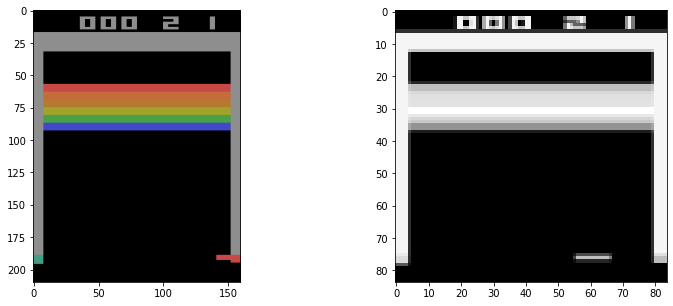

In [2]:
# Create and wrap the environment

env = make_atari('BreakoutNoFrameskip-v4') # only use in no frameskip environment
# env = make_atari('PongNoFrameskip-v4')

env = wrap_deepmind(env, scale = False, frame_stack=True )
n_actions = env.action_space.n
print(n_actions)
state_dim = env.observation_space.shape
# env.render()
test = env.reset()

for i in range(100):
    test = env.step(env.action_space.sample())[0]
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.imshow(env.render("rgb_array"))
print(env.render("rgb_array").shape)
plt.subplot(132)
plt.imshow(test._force()[...,0],cmap = plt.cm.gray) 
print(test._force()[...,0].shape)
plt.show()
env.close()

output_size =1+ (input_size+2*padding-kernel_size)/stride

In [3]:
class DQN(nn.Module):
    def __init__(self, in_channels=4, num_actions=5):
        """
        Initialize a deep Q-learning network as described in
        https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf
        Arguments:
            in_channels: number of channel of input.
                i.e The number of most recent frames stacked together as describe in the paper
            num_actions: number of action-value to output, one-to-one correspondence to action in game.
        """
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=8, stride=4) #(84 + 2*0-8)/4+1=20 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc4 = nn.Linear(7 * 7 * 64, 512)
        self.fc5 = nn.Linear(512, num_actions)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.fc4(x.view(x.size(0), -1))) #输出的维度是为[x.size(0),1]
        return self.fc5(x)


<center><img src="./image/图CNN.png" height="500" width="500" ></center>

In [4]:
class Memory_Buffer(object):
    def __init__(self, memory_size=1000):
        self.buffer = []
        self.memory_size = memory_size
        self.next_idx = 0
        
    def push(self, state, action, reward, next_state, done):
        data = (state, action, reward, next_state, done)
        if len(self.buffer) <= self.memory_size: # buffer not full
            self.buffer.append(data)
        else: # buffer is full
            self.buffer[self.next_idx] = data
        self.next_idx = (self.next_idx + 1) % self.memory_size #先进先出

    def sample(self, batch_size):
        states, actions, rewards, next_states, dones = [], [], [], [], []
        for i in range(batch_size):
            idx = random.randint(0, self.size() - 1)
            data = self.buffer[idx]
            state, action, reward, next_state, done= data
            states.append(state)
            actions.append(action)
            rewards.append(reward)
            next_states.append(next_state)
            dones.append(done)
            
            
        return np.concatenate(states), actions, rewards, np.concatenate(next_states), dones
    
    def size(self):
        return len(self.buffer)


$L(\theta) = E_{\pi_{\theta}}[{(r+\gamma{max_{a^{'}}}Q(s^{'},a^{'},\theta^{'})-Q(s,a,\theta))}^2]$

In [5]:
class DQNAgent: 
    def __init__(self, in_channels = 1, action_space = [], USE_CUDA = False, memory_size = 10000, epsilon  = 1, lr = 1e-4):
        self.epsilon = epsilon
        self.action_space = action_space
        self.memory_buffer = Memory_Buffer(memory_size)
        self.DQN = DQN(in_channels = in_channels, num_actions = action_space.n)
        self.DQN_target = DQN(in_channels = in_channels, num_actions = action_space.n)
        self.DQN_target.load_state_dict(self.DQN.state_dict())


        self.USE_CUDA = USE_CUDA
        if USE_CUDA:
            self.DQN = self.DQN.cuda()
            self.DQN_target = self.DQN_target.cuda()
        self.optimizer = optim.RMSprop(self.DQN.parameters(),lr=lr, eps=0.001, alpha=0.95)

    def observe(self, lazyframe):
        # from Lazy frame to tensor
        state =  torch.from_numpy(lazyframe._force().transpose(2,0,1)[None]/255).float()
        if self.USE_CUDA:
            state = state.cuda()
        return state

    def value(self, state):
        q_values = self.DQN(state)
        return q_values
    
    def act(self, state, epsilon = None):
        """
        sample actions with epsilon-greedy policy
        recap: with p = epsilon pick random action, else pick action with highest Q(s,a)
        """
        if epsilon is None: epsilon = self.epsilon

        q_values = self.value(state).cpu().detach().numpy()
        if random.random()<epsilon:
            aciton = random.randrange(self.action_space.n)
        else:
            aciton = q_values.argmax(1)[0]
        return aciton
    
    def compute_td_loss(self, states, actions, rewards, next_states, is_done, gamma=0.99):
        """ Compute td loss using torch operations only. Use the formula above. """
        actions = torch.tensor(actions).long()    # shape: [batch_size]
        rewards = torch.tensor(rewards, dtype =torch.float)  # shape: [batch_size]
        is_done = torch.tensor(is_done, dtype = torch.uint8)  # shape: [batch_size]
        
        if self.USE_CUDA:
            actions = actions.cuda()
            rewards = rewards.cuda()
            is_done = is_done.cuda()

        # get q-values for all actions in current states
        predicted_qvalues = self.DQN(states)   #[32,action]
#         print("predicted_qvalues:",predicted_qvalues)
#         input()
        # select q-values for chosen actions
        predicted_qvalues_for_actions = predicted_qvalues[
          range(states.shape[0]), actions
        ]
#         print("predicted_qvalues_for_actions:",predicted_qvalues_for_actions)
#         input()
        # compute q-values for all actions in next states
        predicted_next_qvalues = self.DQN_target(next_states) 

        # compute V*(next_states) using predicted next q-values
        next_state_values =  predicted_next_qvalues.max(-1)[0] 

        # compute "target q-values" for loss - it's what's inside square parentheses in the above formula.
        target_qvalues_for_actions = rewards + gamma *next_state_values 

        # at the last state we shall use simplified formula: Q(s,a) = r(s,a) since s' doesn't exist
        target_qvalues_for_actions = torch.where(
            is_done, rewards, target_qvalues_for_actions)

        # mean squared error loss to minimize
        #loss = torch.mean((predicted_qvalues_for_actions -
        #                   target_qvalues_for_actions.detach()) ** 2)
        loss = F.smooth_l1_loss(predicted_qvalues_for_actions, target_qvalues_for_actions.detach())

        return loss
    
    def sample_from_buffer(self, batch_size):
        states, actions, rewards, next_states, dones = [], [], [], [], []
        for i in range(batch_size):
            idx = random.randint(0, self.memory_buffer.size() - 1)
            data = self.memory_buffer.buffer[idx]
            frame, action, reward, next_frame, done= data
            states.append(self.observe(frame))
            actions.append(action)
            rewards.append(reward)
            next_states.append(self.observe(next_frame))
            dones.append(done)
        return torch.cat(states), actions, rewards, torch.cat(next_states), dones

    def learn_from_experience(self, batch_size):
        if self.memory_buffer.size() > batch_size:
            states, actions, rewards, next_states, dones = self.sample_from_buffer(batch_size)
            td_loss = self.compute_td_loss(states, actions, rewards, next_states, dones)
            self.optimizer.zero_grad()
            td_loss.backward()
            for param in self.DQN.parameters():
                param.grad.data.clamp_(-1, 1) #梯度截断，防止梯度爆炸

            self.optimizer.step()
            return(td_loss.item())
        else:
            return(0)
    

In [6]:
# if __name__ == '__main__':
    
# Training DQN in PongNoFrameskip-v4 
idname = 'PongNoFrameskip-v4'
env = make_atari(idname)
env = wrap_deepmind(env, scale = False, frame_stack=True)
state = env.reset()
print(state.count())
gamma = 0.99
epsilon_max = 1
epsilon_min = 0.01
eps_decay = 30000
frames = 2000000
USE_CUDA = True
learning_rate = 2e-4
max_buff = 100000
update_tar_interval = 1000
batch_size = 32
print_interval = 1000
log_interval = 1000
learning_start = 10000
win_reward = 18     # Pong-v4
win_break = True

action_space = env.action_space
action_dim = env.action_space.n
state_dim = env.observation_space.shape[0]
state_channel = env.observation_space.shape[2]
agent = DQNAgent(in_channels = state_channel, action_space= action_space, USE_CUDA = USE_CUDA, lr = learning_rate)

frame = env.reset()

episode_reward = 0
all_rewards = []
losses = []
episode_num = 0
is_win = False
# tensorboard
summary_writer = SummaryWriter(log_dir = "DQN_stackframe", comment= "good_makeatari")

# e-greedy decay
epsilon_by_frame = lambda frame_idx: epsilon_min + (epsilon_max - epsilon_min) * math.exp(
            -1. * frame_idx / eps_decay)
# plt.plot([epsilon_by_frame(i) for i in range(10000)])

for i in range(frames):
    epsilon = epsilon_by_frame(i)
    state_tensor = agent.observe(frame)
    action = agent.act(state_tensor, epsilon)
    
    next_frame, reward, done, _ = env.step(action)
    
    episode_reward += reward
    agent.memory_buffer.push(frame, action, reward, next_frame, done)
    frame = next_frame
    
    loss = 0
    if agent.memory_buffer.size() >= learning_start:
        loss = agent.learn_from_experience(batch_size)
        losses.append(loss)

    if i % print_interval == 0:
        print("frames: %5d, reward: %5f, loss: %4f, epsilon: %5f, episode: %4d" % (i, np.mean(all_rewards[-10:]), loss, epsilon, episode_num))
        summary_writer.add_scalar("Temporal Difference Loss", loss, i)
        summary_writer.add_scalar("Mean Reward", np.mean(all_rewards[-10:]), i)
        summary_writer.add_scalar("Epsilon", epsilon, i)
        
    if i % update_tar_interval == 0:
        agent.DQN_target.load_state_dict(agent.DQN.state_dict())
    
    if done:
        
        frame = env.reset()
        
        all_rewards.append(episode_reward)
        episode_reward = 0
        episode_num += 1
        avg_reward = float(np.mean(all_rewards[-100:]))

summary_writer.close()

4


/home/ouyangz/.conda/envs/gym/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ouyangz/.conda/envs/gym/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


frames:     0, reward:   nan, loss: 0.000000, epsilon: 1.000000, episode:    0
frames:  1000, reward: -21.000000, loss: 0.000000, epsilon: 0.967544, episode:    1
frames:  2000, reward: -21.000000, loss: 0.000000, epsilon: 0.936152, episode:    2
frames:  3000, reward: -21.000000, loss: 0.000000, epsilon: 0.905789, episode:    3
frames:  4000, reward: -20.250000, loss: 0.000000, epsilon: 0.876422, episode:    4
frames:  5000, reward: -20.400000, loss: 0.000000, epsilon: 0.848017, episode:    5
frames:  6000, reward: -20.500000, loss: 0.000000, epsilon: 0.820543, episode:    6
frames:  7000, reward: -20.625000, loss: 0.000000, epsilon: 0.793971, episode:    8
frames:  8000, reward: -20.666667, loss: 0.000000, epsilon: 0.768269, episode:    9
frames:  9000, reward: -20.700000, loss: 0.000000, epsilon: 0.743410, episode:   10
frames: 10000, reward: -20.700000, loss: 0.000421, epsilon: 0.719366, episode:   12
frames: 11000, reward: -20.700000, loss: 0.015133, epsilon: 0.696110, episode:   

frames: 98000, reward: -20.100000, loss: 0.002504, epsilon: 0.047752, episode:  104
frames: 99000, reward: -19.900000, loss: 0.001221, epsilon: 0.046514, episode:  105
frames: 100000, reward: -19.800000, loss: 0.004040, epsilon: 0.045317, episode:  106
frames: 101000, reward: -19.300000, loss: 0.015730, epsilon: 0.044159, episode:  107
frames: 102000, reward: -19.300000, loss: 0.001668, epsilon: 0.043040, episode:  107
frames: 103000, reward: -19.200000, loss: 0.003280, epsilon: 0.041956, episode:  108
frames: 104000, reward: -19.000000, loss: 0.006486, epsilon: 0.040909, episode:  109
frames: 105000, reward: -19.000000, loss: 0.001416, epsilon: 0.039895, episode:  109
frames: 106000, reward: -18.900000, loss: 0.002020, epsilon: 0.038915, episode:  110
frames: 107000, reward: -19.000000, loss: 0.003285, epsilon: 0.037967, episode:  111
frames: 108000, reward: -19.300000, loss: 0.002000, epsilon: 0.037050, episode:  112
frames: 109000, reward: -19.100000, loss: 0.002524, epsilon: 0.0361

frames: 195000, reward: -12.700000, loss: 0.007836, epsilon: 0.011488, episode:  157
frames: 196000, reward: -12.700000, loss: 0.002527, epsilon: 0.011440, episode:  157
frames: 197000, reward: -12.700000, loss: 0.003091, epsilon: 0.011392, episode:  157
frames: 198000, reward: -12.600000, loss: 0.011150, epsilon: 0.011347, episode:  158
frames: 199000, reward: -13.400000, loss: 0.002067, epsilon: 0.011303, episode:  159
frames: 200000, reward: -13.400000, loss: 0.004269, epsilon: 0.011260, episode:  159
frames: 201000, reward: -14.300000, loss: 0.004734, epsilon: 0.011219, episode:  160
frames: 202000, reward: -14.300000, loss: 0.001433, epsilon: 0.011179, episode:  160
frames: 203000, reward: -14.300000, loss: 0.001893, epsilon: 0.011140, episode:  160
frames: 204000, reward: -15.400000, loss: 0.002712, epsilon: 0.011103, episode:  161
frames: 205000, reward: -15.400000, loss: 0.002268, epsilon: 0.011066, episode:  161
frames: 206000, reward: -15.400000, loss: 0.004169, epsilon: 0.01

frames: 292000, reward: -10.100000, loss: 0.001137, epsilon: 0.010059, episode:  187
frames: 293000, reward: -10.100000, loss: 0.000874, epsilon: 0.010057, episode:  187
frames: 294000, reward: -10.000000, loss: 0.000973, epsilon: 0.010055, episode:  188
frames: 295000, reward: -10.000000, loss: 0.000876, epsilon: 0.010053, episode:  188
frames: 296000, reward: -10.000000, loss: 0.001481, epsilon: 0.010051, episode:  188
frames: 297000, reward: -10.400000, loss: 0.002080, epsilon: 0.010050, episode:  189
frames: 298000, reward: -10.400000, loss: 0.001189, epsilon: 0.010048, episode:  189
frames: 299000, reward: -10.400000, loss: 0.000768, epsilon: 0.010046, episode:  189
frames: 300000, reward: -10.400000, loss: 0.001110, epsilon: 0.010045, episode:  189
frames: 301000, reward: -10.700000, loss: 0.001241, epsilon: 0.010043, episode:  190
frames: 302000, reward: -10.700000, loss: 0.002660, epsilon: 0.010042, episode:  190
frames: 303000, reward: -10.700000, loss: 0.002544, epsilon: 0.01

frames: 389000, reward: -6.100000, loss: 0.002304, epsilon: 0.010002, episode:  212
frames: 390000, reward: -5.800000, loss: 0.000450, epsilon: 0.010002, episode:  213
frames: 391000, reward: -5.800000, loss: 0.001590, epsilon: 0.010002, episode:  213
frames: 392000, reward: -5.800000, loss: 0.000797, epsilon: 0.010002, episode:  213
frames: 393000, reward: -5.800000, loss: 0.002108, epsilon: 0.010002, episode:  213
frames: 394000, reward: -5.800000, loss: 0.000958, epsilon: 0.010002, episode:  214
frames: 395000, reward: -5.800000, loss: 0.000819, epsilon: 0.010002, episode:  214
frames: 396000, reward: -5.800000, loss: 0.000955, epsilon: 0.010002, episode:  214
frames: 397000, reward: -6.000000, loss: 0.000471, epsilon: 0.010002, episode:  215
frames: 398000, reward: -6.000000, loss: 0.000797, epsilon: 0.010002, episode:  215
frames: 399000, reward: -6.000000, loss: 0.000634, epsilon: 0.010002, episode:  215
frames: 400000, reward: -6.000000, loss: 0.001001, epsilon: 0.010002, episod

frames: 488000, reward: -3.000000, loss: 0.001846, epsilon: 0.010000, episode:  242
frames: 489000, reward: -3.000000, loss: 0.000792, epsilon: 0.010000, episode:  242
frames: 490000, reward: -0.900000, loss: 0.001174, epsilon: 0.010000, episode:  243
frames: 491000, reward: -0.900000, loss: 0.001391, epsilon: 0.010000, episode:  243
frames: 492000, reward: -0.900000, loss: 0.001016, epsilon: 0.010000, episode:  243
frames: 493000, reward: -0.900000, loss: 0.000733, epsilon: 0.010000, episode:  243
frames: 494000, reward: -1.300000, loss: 0.000499, epsilon: 0.010000, episode:  244
frames: 495000, reward: -1.300000, loss: 0.001848, epsilon: 0.010000, episode:  244
frames: 496000, reward: 1.100000, loss: 0.000708, epsilon: 0.010000, episode:  245
frames: 497000, reward: 1.100000, loss: 0.004196, epsilon: 0.010000, episode:  245
frames: 498000, reward: 1.100000, loss: 0.002113, epsilon: 0.010000, episode:  245
frames: 499000, reward: 1.100000, loss: 0.000366, epsilon: 0.010000, episode:  

frames: 587000, reward: 9.600000, loss: 0.000497, epsilon: 0.010000, episode:  276
frames: 588000, reward: 9.600000, loss: 0.000564, epsilon: 0.010000, episode:  276
frames: 589000, reward: 9.600000, loss: 0.000488, epsilon: 0.010000, episode:  277
frames: 590000, reward: 9.600000, loss: 0.000654, epsilon: 0.010000, episode:  277
frames: 591000, reward: 10.500000, loss: 0.000423, epsilon: 0.010000, episode:  278
frames: 592000, reward: 10.500000, loss: 0.000289, epsilon: 0.010000, episode:  278
frames: 593000, reward: 10.500000, loss: 0.000554, epsilon: 0.010000, episode:  278
frames: 594000, reward: 11.400000, loss: 0.000429, epsilon: 0.010000, episode:  279
frames: 595000, reward: 11.400000, loss: 0.001254, epsilon: 0.010000, episode:  279
frames: 596000, reward: 11.400000, loss: 0.003493, epsilon: 0.010000, episode:  279
frames: 597000, reward: 12.300000, loss: 0.000410, epsilon: 0.010000, episode:  280
frames: 598000, reward: 12.300000, loss: 0.002243, epsilon: 0.010000, episode:  

frames: 685000, reward: 12.300000, loss: 0.000731, epsilon: 0.010000, episode:  314
frames: 686000, reward: 12.300000, loss: 0.000712, epsilon: 0.010000, episode:  314
frames: 687000, reward: 12.300000, loss: 0.001138, epsilon: 0.010000, episode:  314
frames: 688000, reward: 12.700000, loss: 0.000966, epsilon: 0.010000, episode:  315
frames: 689000, reward: 12.700000, loss: 0.001151, epsilon: 0.010000, episode:  315
frames: 690000, reward: 12.700000, loss: 0.000668, epsilon: 0.010000, episode:  315
frames: 691000, reward: 12.700000, loss: 0.000705, epsilon: 0.010000, episode:  315
frames: 692000, reward: 10.900000, loss: 0.000718, epsilon: 0.010000, episode:  316
frames: 693000, reward: 10.900000, loss: 0.000551, epsilon: 0.010000, episode:  316
frames: 694000, reward: 11.500000, loss: 0.001113, epsilon: 0.010000, episode:  317
frames: 695000, reward: 11.500000, loss: 0.000728, epsilon: 0.010000, episode:  317
frames: 696000, reward: 11.500000, loss: 0.000831, epsilon: 0.010000, episod

frames: 783000, reward: 19.600000, loss: 0.000302, epsilon: 0.010000, episode:  357
frames: 784000, reward: 20.000000, loss: 0.000139, epsilon: 0.010000, episode:  358
frames: 785000, reward: 20.000000, loss: 0.000263, epsilon: 0.010000, episode:  358
frames: 786000, reward: 19.900000, loss: 0.000211, epsilon: 0.010000, episode:  359
frames: 787000, reward: 19.900000, loss: 0.000244, epsilon: 0.010000, episode:  359
frames: 788000, reward: 19.500000, loss: 0.000102, epsilon: 0.010000, episode:  360
frames: 789000, reward: 19.600000, loss: 0.000113, epsilon: 0.010000, episode:  361
frames: 790000, reward: 19.600000, loss: 0.000204, epsilon: 0.010000, episode:  361
frames: 791000, reward: 20.100000, loss: 0.000105, epsilon: 0.010000, episode:  362
frames: 792000, reward: 20.100000, loss: 0.000120, epsilon: 0.010000, episode:  362
frames: 793000, reward: 20.000000, loss: 0.000944, epsilon: 0.010000, episode:  363
frames: 794000, reward: 20.000000, loss: 0.000075, epsilon: 0.010000, episod

frames: 881000, reward: 19.300000, loss: 0.000086, epsilon: 0.010000, episode:  411
frames: 882000, reward: 19.300000, loss: 0.000118, epsilon: 0.010000, episode:  411
frames: 883000, reward: 18.700000, loss: 0.000292, epsilon: 0.010000, episode:  412
frames: 884000, reward: 18.700000, loss: 0.000310, epsilon: 0.010000, episode:  412
frames: 885000, reward: 18.600000, loss: 0.000363, epsilon: 0.010000, episode:  413
frames: 886000, reward: 18.600000, loss: 0.000259, epsilon: 0.010000, episode:  413
frames: 887000, reward: 18.800000, loss: 0.000214, epsilon: 0.010000, episode:  414
frames: 888000, reward: 19.000000, loss: 0.000150, epsilon: 0.010000, episode:  415
frames: 889000, reward: 19.000000, loss: 0.000230, epsilon: 0.010000, episode:  415
frames: 890000, reward: 19.000000, loss: 0.000221, epsilon: 0.010000, episode:  416
frames: 891000, reward: 19.000000, loss: 0.000186, epsilon: 0.010000, episode:  416
frames: 892000, reward: 18.900000, loss: 0.000283, epsilon: 0.010000, episod

frames: 979000, reward: 19.600000, loss: 0.000114, epsilon: 0.010000, episode:  466
frames: 980000, reward: 19.600000, loss: 0.000141, epsilon: 0.010000, episode:  466
frames: 981000, reward: 19.900000, loss: 0.000133, epsilon: 0.010000, episode:  467
frames: 982000, reward: 19.900000, loss: 0.000139, epsilon: 0.010000, episode:  467
frames: 983000, reward: 19.900000, loss: 0.000161, epsilon: 0.010000, episode:  468
frames: 984000, reward: 19.900000, loss: 0.000083, epsilon: 0.010000, episode:  468
frames: 985000, reward: 19.800000, loss: 0.000287, epsilon: 0.010000, episode:  469
frames: 986000, reward: 19.800000, loss: 0.000145, epsilon: 0.010000, episode:  470
frames: 987000, reward: 19.800000, loss: 0.000080, epsilon: 0.010000, episode:  470
frames: 988000, reward: 20.200000, loss: 0.000254, epsilon: 0.010000, episode:  471
frames: 989000, reward: 20.200000, loss: 0.000141, epsilon: 0.010000, episode:  471
frames: 990000, reward: 20.100000, loss: 0.000057, epsilon: 0.010000, episod

frames: 1076000, reward: 19.600000, loss: 0.002684, epsilon: 0.010000, episode:  520
frames: 1077000, reward: 19.500000, loss: 0.001835, epsilon: 0.010000, episode:  521
frames: 1078000, reward: 19.500000, loss: 0.000265, epsilon: 0.010000, episode:  521
frames: 1079000, reward: 19.700000, loss: 0.000097, epsilon: 0.010000, episode:  522
frames: 1080000, reward: 19.700000, loss: 0.000060, epsilon: 0.010000, episode:  522
frames: 1081000, reward: 20.000000, loss: 0.000090, epsilon: 0.010000, episode:  523
frames: 1082000, reward: 20.100000, loss: 0.000090, epsilon: 0.010000, episode:  524
frames: 1083000, reward: 20.100000, loss: 0.000118, epsilon: 0.010000, episode:  524
frames: 1084000, reward: 20.200000, loss: 0.002037, epsilon: 0.010000, episode:  525
frames: 1085000, reward: 20.200000, loss: 0.001469, epsilon: 0.010000, episode:  525
frames: 1086000, reward: 19.400000, loss: 0.000062, epsilon: 0.010000, episode:  526
frames: 1087000, reward: 19.400000, loss: 0.000108, epsilon: 0.01

KeyboardInterrupt: 

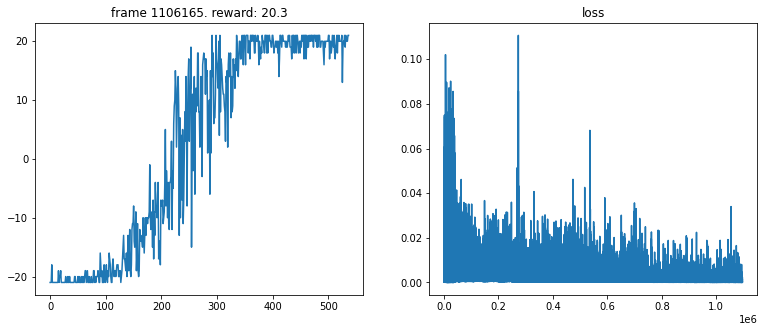

In [7]:
def plot_training(frame_idx, rewards, losses):
    pd.DataFrame(rewards, columns=['Reward']).to_csv(idname, index=False)
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, np.mean(rewards[-10:])))
    plt.plot(rewards)
    plt.subplot(132)
    plt.title('loss')
    plt.plot(losses)
    plt.show()

plot_training(i, all_rewards, losses)